# Import Packages

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define Lorenz System

In [ ]:
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Create Heat Map for Lorenz System

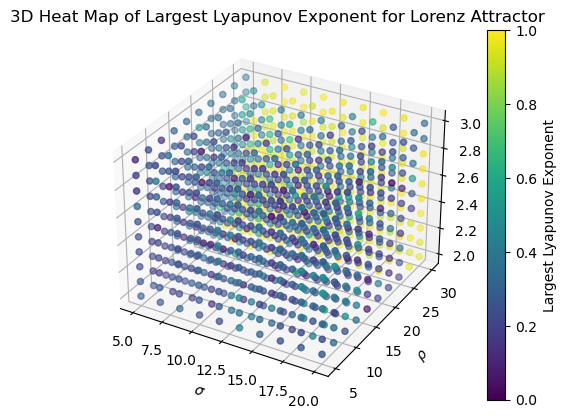

In [3]:
t_final = 100
dt = 0.01

# parameter choices
sigma_vals = np.linspace(5, 20, 10)
rho_vals = np.linspace(5, 30, 10)
beta_vals = np.linspace(2, 3, 10)

# Lyapunov exponent for each combination
lyapunov_exponents = []

# nested for loops to iterate over parameter values
for sigma in sigma_vals:
    for rho in rho_vals:
        for beta in beta_vals:
            
            initial_state = [0.1, 0.1, 0.1]
            initial_state_perturbed = [0.1 + 1e-6, 0.1, 0.1] #introduces small perturbation to later calculate exponent
            
            # integrate
            t_span = [0, t_final]
            t_eval = np.arange(0, t_final, dt)
            
            sol = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), t_eval=t_eval) #solve system of ODEs for given parameters/initial conditions
            sol_perturbed = solve_ivp(lorenz, t_span, initial_state_perturbed, args=(sigma, rho, beta), t_eval=t_eval) #solve system of ODEs for given parameters/perturbed conditions
            
            # Compute the distance between trajectories over time (distance formula/magnitude)
            distance = np.sqrt((sol.y[0] - sol_perturbed.y[0])**2 + 
                               (sol.y[1] - sol_perturbed.y[1])**2 +
                               (sol.y[2] - sol_perturbed.y[2])**2)
            lyapunov_exponent = np.log(distance[-1] / distance[0]) / t_final # calculates the largest Lyapunov exponent using the formula involving the natural logarithm of the ratio of final to initial distances, normalized by the total time.
            lyapunov_exponents.append((sigma, rho, beta, lyapunov_exponent))

# convert the list to a numpy array
lyapunov_exponents = np.array(lyapunov_exponents)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normalize the Lyapunov exponents for coloring (therefore, a wider range of colors are used despite there being a limited range of values)
norm = plt.Normalize(lyapunov_exponents[:, 3].min(), lyapunov_exponents[:, 3].max())
colors = plt.cm.viridis(norm(lyapunov_exponents[:, 3]))

# Plot the data
sc = ax.scatter(lyapunov_exponents[:, 0], lyapunov_exponents[:, 1], lyapunov_exponents[:, 2], c=colors, marker='o')
ax.set_xlabel('$\sigma$')
ax.set_ylabel('$\\rho$')
ax.set_zlabel('$\\beta$')

# Add a color bar
cbar = plt.colorbar(sc)
cbar.set_label('Largest Lyapunov Exponent')

plt.title('3D Heat Map of Largest Lyapunov Exponent for Lorenz Attractor')
plt.show()
